First, fetch https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat and place it in  ~/scikit_learn_data/mldata

In [1]:
import warnings
warnings.simplefilter("ignore", category=PendingDeprecationWarning)

In [2]:
from sklearn.datasets import fetch_mldata

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
mnist['data'].shape
mnist['target'].shape

(70000,)

In [4]:
X = digit = mnist['data']
y = mnist['target']
index = 8889
digit = mnist['data'][index]
actual = mnist['target'][index]

In [5]:
digit = digit.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

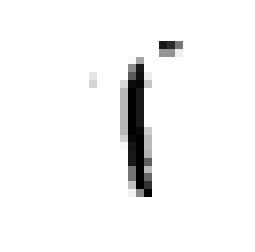

In [6]:
plt.imshow(digit, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis("off")

In [7]:
actual

1.0

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [9]:
import numpy as np

In [10]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
y_train[66:99]

array([ 1.,  8.,  1.,  9.,  0.,  5.,  2.,  0.,  4.,  2.,  4.,  8.,  8.,
        3.,  0.,  1.,  9.,  2.,  8.,  6.,  8.,  1.,  9.,  2.,  9.,  1.,
        2.,  7.,  2.,  9.,  0.,  0.,  3.])

In [13]:
y_train_5[66:99]

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False], dtype=bool)

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [15]:
sgd_clf.predict(X_test[5178])

/home/anand/miniconda3/envs/py34/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ True], dtype=bool)

In [16]:
y_test[5178]

5.0

In [17]:
f = 0
for i in range(10000):
    if y_test_5[i] == True:
        if not sgd_clf.predict(X_test[i]):
            f += 1
print(f)

266


/home/anand/miniconda3/envs/py34/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/anand/miniconda3/envs/py34/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/anand/miniconda3/envs/py34/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1,

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=10, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.9502, 0.96565 and 0.96495

0.968338610232
0.955666666667
0.940666666667
0.964333333333
0.958333333333
0.954166666667
0.968666666667
0.957666666667
0.945333333333
0.965160860143


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9712 ,  0.96285,  0.94765])

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54101,   478],
       [ 1842,  3579]])

In [22]:
from sklearn.metrics import precision_score, recall_score

In [23]:
precision_score(y_train_5, y_train_pred)

0.88217894996302681

In [24]:
recall_score(y_train_5, y_train_pred)

0.66021029330381853

In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.75522262080607727

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")


In [27]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

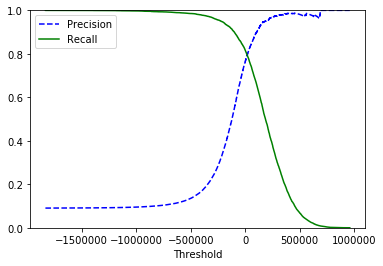

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [29]:
y_train_pred_90 = (y_scores > 70000)


In [30]:
precision_score(y_train_5, y_train_pred_90)

0.86255819108845044

In [31]:
recall_score(y_train_5, y_train_pred_90)

0.71776425013835088

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

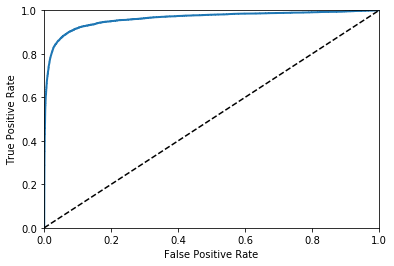

In [33]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [34]:
from sklearn.metrics import roc_auc_score

In [35]:
roc_auc_score(y_train_5, y_scores)

0.96227826097366409

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [37]:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

/home/anand/miniconda3/envs/py34/lib/python3.4/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	lower center
	right
	upper center
	upper left
	center
	lower right
	upper right
	center right
	center left
	lower left
	best

  six.iterkeys(self.codes))))


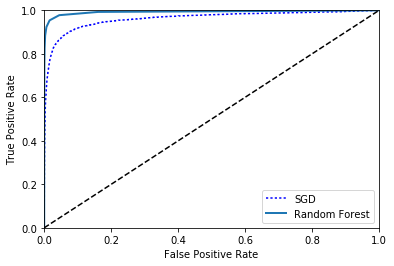

In [38]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()